In [712]:
%reset

In [904]:
# Code for calculating powder mass flow from offline weigh data
# Created: 06-14-2024
# Modified: 05-23-2024

# Analysis for DATE DATE DATE

import pandas as pd
import numpy as np
import os
from os import listdir
from os.path import isfile, join
import importlib
from pathlib import Path


from powder_functions import *
import powder_functions
powder_functions = importlib.reload(powder_functions)

# Copy + paste files to analyze in data
# Set variables (RPM and step time) based on experimental parameters
# Run program
# Ideally, plot exported csv files in R


# Variables

In [816]:
# IF ANALYZING MORE THAN 1 DATASET, ***EXPERIMENTAL VARIABLES MUST BE THE SAME***
# Range of RPMs and time steps must be equal

# Folder name for exported files
experimentID = "(230306) PML 316L Transient 5LPM"


# List range of RPMs tested
RPM = np.array([0.1, 0.2, 0.3, 0.4, 0.5])

# See getMassFlow step
"""# Designate start and end times for RPM changes
# Experiment start deposition, end deposition, time period at a single RPM
start_time = np.arange(10, 100, 20)
end_time = np.arange(20, 110, 20)"""

'# Designate start and end times for RPM changes\n# Experiment start deposition, end deposition, time period at a single RPM\nstart_time = np.arange(10, 100, 20)\nend_time = np.arange(20, 110, 20)'

# Import Data

In [817]:
csv = [os.path.splitext(file)[0] for file in os.listdir("data/") if file.endswith('.csv')]
print(csv)

importData = {}
data = {}

for file in csv:
    filepath = os.path.join("data/", file + ".csv")
    importData[file] = pd.read_csv(filepath)
    filename = file.replace('.csv', '')

['(230306) 2_Powder_mass_flow_PML_SS316L_0.1-0.5']


# Clean Data

In [818]:
clean_data = {}
clean_with_delay = {}
delay = {}

# Input an overestimate of the delay row index
# Used to find largest change in initial values (experiment start)
overestimate_delay = 900

for file in csv:
    clean_data[file], clean_with_delay[file], delay[file] = cleanData(importData[file], overestimate_delay)

print(clean_data)
print(clean_with_delay)
print(delay)

Experiment begins at row index 614
The delay is 6.707 sec

{'(230306) 2_Powder_mass_flow_PML_SS316L_0.1-0.5':          Time    Mass
627     0.142  0.0001
628     0.153  0.1579
629     0.164  0.1695
630     0.175  0.1800
631     0.185  0.1899
...       ...     ...
9766   99.964  9.2770
9767   99.976  9.2824
9768   99.987  9.2879
9769   99.998  9.2931
9770  100.008  9.2975

[9144 rows x 2 columns]}
{'(230306) 2_Powder_mass_flow_PML_SS316L_0.1-0.5':          Time    Mass
13      0.000  0.0000
14      0.011  0.0000
15      0.022  0.0000
16      0.033  0.0000
17      0.044  0.0000
...       ...     ...
9766  106.529  9.2776
9767  106.541  9.2830
9768  106.552  9.2885
9769  106.563  9.2937
9770  106.573  9.2981

[9758 rows x 2 columns]}
{'(230306) 2_Powder_mass_flow_PML_SS316L_0.1-0.5': 6.707}



# Calculate Steady State Mass Flow

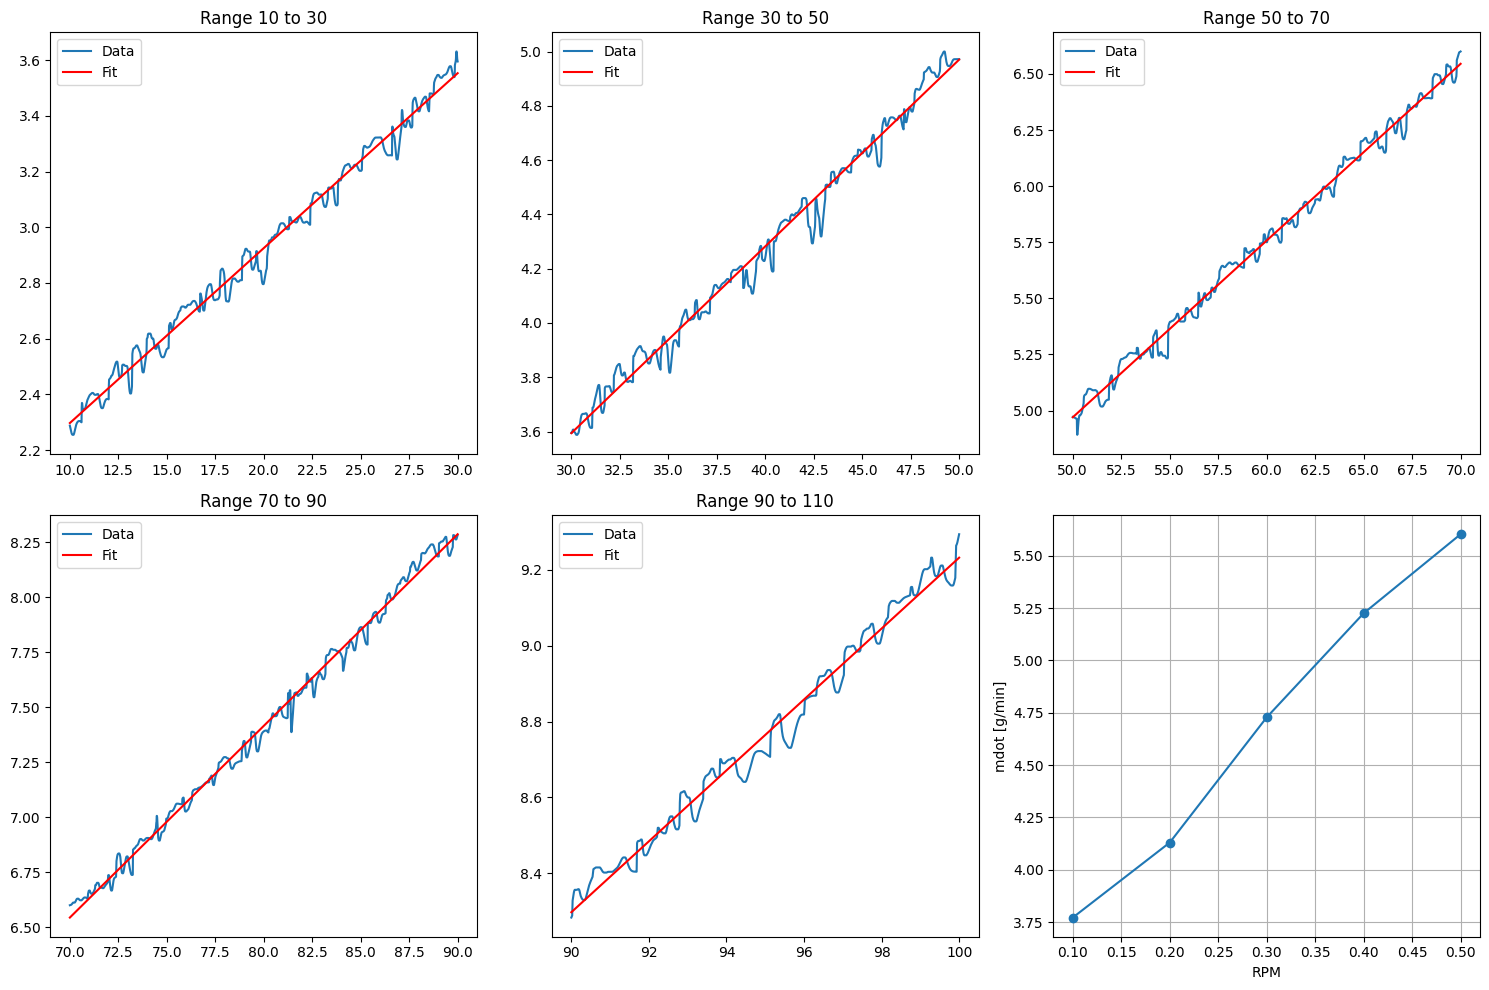

{'(230306) 2_Powder_mass_flow_PML_SS316L_0.1-0.5':    RPM  Mass Flow [g/min]
0  0.1           3.771775
1  0.2           4.130124
2  0.3           4.728175
3  0.4           5.225397
4  0.5           5.602989}


In [819]:
mass_flow = {}

# Designate start and end times for RPM changes
# Experiment start deposition, end deposition, time period at a single RPM
start_time = np.arange(10, 110, 20)
end_time = np.arange(30, 130, 20)

for file in csv:
    mass_flow[file] = getSteadyMassFlow(clean_data[file], RPM, start_time, end_time)

print(mass_flow)



# Plot Mass Flow

In [ ]:
"""fig, axs = plt.subplots(2, 3, figsize=(15, 10))

    for i in range(len(start_time)):
        # Segment data into chunks for a single RPM
        start_RPM = np.argmin(np.abs(df['Time'] - start_time[i]))
        end_RPM = np.argmin(np.abs(df['Time'] - end_time[i]))

        time_RPM = df['Time'][start_RPM:end_RPM]
        mass_RPM = df['Mass'][start_RPM:end_RPM]

        # Fit linear model
        slope, intercept, _, _, _ = linregress(time_RPM, mass_RPM)
        mdot[i] = slope

        # Plot fitted line
        axs[i // 3, i % 3].plot(time_RPM, mass_RPM, label='Data')
        axs[i // 3, i % 3].plot(time_RPM, intercept + slope * time_RPM, 'r-', label='Fit')
        axs[i // 3, i % 3].set_title(f'Range {start_time[i]} to {end_time[i]}')
        axs[i // 3, i % 3].legend()

    # Plot RPM vs mdot
    plt.subplot(2, 3, 6)
    plt.plot(RPM, mdot * 60, 'o-')
    plt.xlabel('RPM')
    plt.ylabel('mdot (g/min)')
    plt.grid(True)

    plt.tight_layout()
    plt.show()"""

# Save Files

In [740]:
export_path = os.path.join("export", experimentID)

# Make a folder in export to save procesed files
if not os.path.exists(export_path):
    os.makedirs(export_path)

for file in csv:
    #clean_data[file].to_csv(os.path.join(export_path, file + "_CLEAN.csv"), index=False)
    clean_with_delay[file].to_csv(os.path.join(export_path, file + "_CLEAN.csv"), index=False)
    #mass_flow[file].to_csv(os.path.join(export_path, file + "_MASSFLOW.csv"), index=False)

# Make a folder in archive to move raw files
if not os.path.exists(os.path.join("data/archive/", experimentID)):
    os.makedirs(os.path.join("data/archive/", experimentID))


# Summarize Data

In [692]:
#for file in csv:
summary = pd.concat([pd.DataFrame(mass_flow[file], columns=['Mass Flow [g/min]']) for file in csv], axis=1, ignore_index=True)
summary.columns = csv
summary.insert(0, "RPM", RPM)
summary.to_csv(os.path.join(export_path, "SUMMARY_" + experimentID + ".csv"), index=False)
print(export_path)

print(summary)

export\(230123) PML Nb 0.1-0.3RPM 5LPM
   RPM  (230123) Powder Flow Measurement_Nb_5LPM
0  0.1                                  0.817092
1  0.2                                  1.190523
2  0.3                                  2.503614


# Fit First Order Model

         Time  Mdot  Input
13      0.000   NaN      0
14      0.011   NaN      0
15      0.022   NaN      0
16      0.033   NaN      0
17      0.044   NaN      0
...       ...   ...    ...
9766  106.529   NaN      1
9767  106.541   NaN      1
9768  106.552   NaN      1
9769  106.563   NaN      1
9770  106.573   NaN      1

[9758 rows x 3 columns]


(-0.1, 0.5)

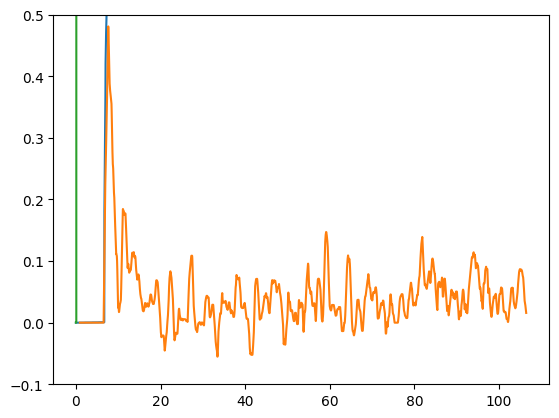

In [905]:
dwell = 0.1

for file in csv:
    gradient_data = gradient(clean_with_delay[file], dwell)
    plt.plot(clean_with_delay[file]['Time'], clean_with_delay[file]['Mass'])
print(gradient_data)

plt.plot(gradient_data['Time'], gradient_data['Mdot'])
plt.plot(gradient_data['Time'], gradient_data['Input'])
plt.ylim([-0.1,0.5])

